# Model Tuning

**Model tuning** means finding the hyperparameters that give us the best performing model. In general, the only way to find the *best* hyperparameters is to try a bunch of combinations and measure the performance of each combo.

The most important thing to remember when tuning a model is that we care about **out-of-sample** performance, not so much **in-sample** performance. 

* **out-of-sample performance** <- this is how well the model does on data it HASN'T seen before - new data that we probably don't even have *real* answers for. This is how well models do in production, so this is what we care about most.
* **in-sample performance** <- this is how well the model does on data that it HAS seen before, the training data. In most situations, most models perform very well on **in-sample** data, but that doesn't always translate to good **out-of-sample** performance.

We've already been tracking **out-of-sample performance** by splitting our data into a **training set** and a **test set**. The model has never "seen" the **test data**, so the model's performance on the test data *should be* similar to the model's performance in production. But wait! As soon as we measure the model's performance on the **test set**, it doesn't *really* count as **out-of-sample** anymore! If we keep testing models on the same data, we're in danger of *accidentally* **over-fitting** the model to the **test set**!

But we also NEED to test a bunch of models for **hyperparameter tuning**. We solve this problem with **cross-validation**.

## Cross-Validation

To perform **cross-validation**, you make a whole bunch of **training sets** and **test sets**. That way, you can use your data multiple times with less danger of **over-fitting** your model.

There are a number of ways to create a bunch of **training** and **test** sets. We're going to take a quick look at 3 common ones and talk about when you'd want to use each one.

### K-Fold Cross-Validation

In this version of **cross-validation**, you randomly split your data into $K$ different subsets, each one about the same size. For example, if you have 1,000 rows in your dataset, you might split that dataset into 3 groups of 333 rows each or 5 groups of 200 rows each or 10 groups of 100 rows each. You keep one of those groups as a **test set** and use the rest of the groups as a **training set**. Then, you use the next group as a **test set** and the rest of the groups as a **training set**, and so on. Here's a nice graphic showing what 5-fold cross-validation might look like.


(https://www.researchgate.net/profile/Chaitanya-Poolla/publication/355367645/figure/fig1/AS:1080106646810624@1634528900194/Five-fold-cross-validation-depicting-training-and-validation-folds.ppm)

![Kfold](https://www.researchgate.net/profile/Chaitanya-Poolla/publication/355367645/figure/fig1/AS:1080106646810624@1634528900194/Five-fold-cross-validation-depicting-training-and-validation-folds.ppm)

### Stratified K-Fold Cross-Validation

This is the same basic idea as **K-Fold Cross-Validation**, but it takes **imbalance** in the **target** variable into account. So, if you have a multi-class classification problem, you're trying to predict whether each row belongs to Group 1, Group 2, or Group 3, **Stratified K-Fold Cross-Validation** will make sure that each Group has approximately the same proportion of rows in each Fold.

So, if Group 1 is 20% of all rows, Group 2 is 30% of all rows, and Group 3 is 50% of all rows, then Group 1 will be 20% of the rows in each fold, Group 2 will be 30% of the rows in each fold, and Group 3 will be 50% of the rows in each fold. Here's a visualization!

(https://dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png)

![StratKFold](https://dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png)

### Monte Carlo Cross-Validation

**Monte Carlo** is part of Monaco. Monaco is a city-state on the Mediterranean Sea surrounded by France and known for being rich, but the **Monte Carlo** part of the city is known for gambling. Watch GoldenEye or Iron Man 2 to learn more. 

In statistics, when we say **Monte Carlo**, we typically mean simulating a random process. Here, **Monte Carlo** means we are going to create a bunch of training and test splits by randomly picking rows of data. This is very similar to **bootstrapping**, but we *typically* don't sample **with replacement** in **Monte Carlo Cross-Validation** and we always sample **with replacement** when **bootstrapping**. If we sample **with replacement**, then you can think of this as **boostrapping** a bunch of training/test sets.

In **boostrapping**, a single row can be chosen more than once. In **Monte Carlo Cross-Validation**, a single row is usually only chosen a single time (although we can let rows be chosen multiple times).

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

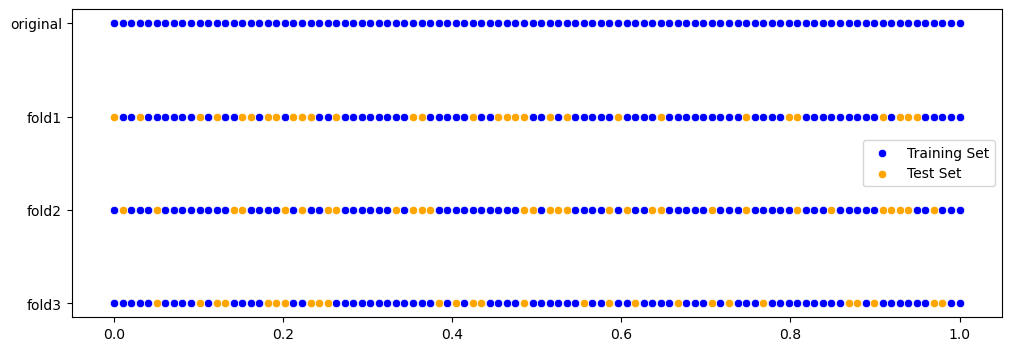

In [2]:
# visualize monte carlo cross-validation
fig, ax = plt.subplots(figsize=(12,4))
x = np.linspace(0, 1, 100)
sns.scatterplot(x=x, y=[3]*len(x), color='blue', ax=ax)
fold1 = np.random.choice(np.arange(len(x)), size=len(x)//3)
x1 = x[[i for i in range(len(x)) if i not in fold1]]
sns.scatterplot(x=x1, y=[2]*len(x1), color='blue', ax=ax)
sns.scatterplot(x=x[fold1], y=[2]*len(fold1), color='orange', ax=ax)

fold2 = np.random.choice(np.arange(len(x)), size=len(x)//3)
x2 = x[[i for i in range(len(x)) if i not in fold2]]
sns.scatterplot(x=x2, y=[1]*len(x2), color='blue', ax=ax)
sns.scatterplot(x=x[fold2], y=[1]*len(fold2), color='orange', ax=ax)

fold3 = np.random.choice(np.arange(len(x)), size=len(x)//3)
x3 = x[[i for i in range(len(x)) if i not in fold3]]
sns.scatterplot(x=x3, y=[0]*len(x3), color='blue', ax=ax, label='Training Set')
sns.scatterplot(x=x[fold3], y=[0]*len(fold3), color='orange', ax=ax, label='Test Set')

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['fold3', 'fold2', 'fold1', 'original']);

# Tuning Hyperparameters

Sci-kit Learn makes cross-validation easy! There are implementations for all three of those cross-validation schemes and more! 

And it makes tuning hyperparameters even easier! We don't have to do the cross-validation ourselves at all! Sci-kit Learn has objects created specifically to use cross-validation to run experiments and tune hyperparameters. It's really easy. We're going to look at two options.

## Baseline Model

In [3]:
# load diabetes data
import pandas as pd
data = pd.read_csv('transformed_diabetes_data.csv')

# train-test split
from sklearn.model_selection import train_test_split

# dummy classifier
from sklearn.dummy import DummyClassifier

In [4]:
# train-test split
train, test = train_test_split(data, test_size=0.2)

# make a baseline model
baseline_model = DummyClassifier(strategy='stratified')
baseline_model.fit(train.drop(columns='outcome'), train['outcome'])

DummyClassifier(strategy='stratified')

Accuracy of the baseline model: 52.32%

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63       100
         1.0       0.31      0.33      0.32        51

    accuracy                           0.52       151
   macro avg       0.48      0.48      0.48       151
weighted avg       0.53      0.52      0.53       151



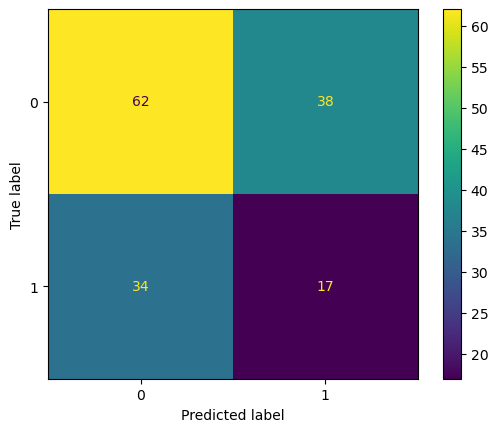

In [5]:
# check metrics for the baseline
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)

pred = baseline_model.predict(test.drop(columns='outcome'))
print(f"Accuracy of the baseline model: {accuracy_score(test['outcome'], pred):.2%}\n")
print(classification_report(test['outcome'], pred))
confmat = confusion_matrix(test['outcome'], pred)
ConfusionMatrixDisplay(confmat).plot();

## Grid Search

When you have group of hyperparameters and you want to test all combinations of specific values, you use a **Grid Search**. This tuning method will go through every combination of hyperparameters that you give it and track the model's performance with each combination. The good thing about using a **Grid Search** is that every combination is tried, so you know that you're getting the best set of parameters. The down side is that the number of combinations can grow really big really fast, so this can be super slow for all but the simplest tuning experiments. Let's try one.

In [6]:
# import svc
from sklearn.svm import SVC

# import grid search
from sklearn.model_selection import GridSearchCV

In [7]:
# perform grid search
parameters = {
    'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
    'gamma': ('auto', 'scale', 0.5),
    'C': (0.1, 0.5, 1.0, 2.0)
}
svc = SVC()
gridsearch = GridSearchCV(svc, parameters, verbose=3, refit=True)
gridsearch.fit(train.drop(columns='outcome'), train['outcome'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.711 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.808 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.694 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.700 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.683 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.708 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.717 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.752 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.1, 0.5, 1.0, 2.0),
                         'gamma': ('auto', 'scale', 0.5),
                         'kernel': ('rbf', 'poly', 'linear', 'sigmoid')},
             verbose=3)

In [8]:
# check the cross-validation accuracy of the best model
gridsearch.best_score_

0.7620661157024793

Accuracy of the best model: 76.82%

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       100
         1.0       0.67      0.61      0.64        51

    accuracy                           0.77       151
   macro avg       0.74      0.73      0.73       151
weighted avg       0.76      0.77      0.77       151



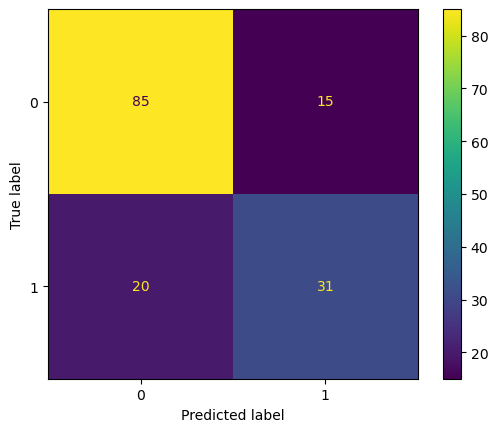

In [9]:
# get metrics of the best model
best_model = gridsearch.best_estimator_
pred = best_model.predict(test.drop(columns='outcome'))
print(f"Accuracy of the best model: {accuracy_score(test['outcome'], pred):.2%}\n")
print(classification_report(test['outcome'], pred))
confmat = confusion_matrix(test['outcome'], pred)
ConfusionMatrixDisplay(confmat).plot();

## Random Search

What do we do when there are too many hyperparameters for a **Grid Search**? Test random of combinations! That's what the sci-kit learn **RandomizedSearchCV** does. If you give it lists of values for hyperparameters, it will try random combinations. You can also give it *distributions* for the hyperparameters using the scipy package and it will draw random samples from that distribution. Let's try it now!

In [10]:
# import random search
from sklearn.model_selection import RandomizedSearchCV

# import uniform distribution from scipy
from scipy.stats import uniform

In [11]:
# try a randomized search
parameters = {
    'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
    'gamma': uniform(loc=0, scale=10),
    'C': uniform(loc=0, scale=10),
    'shrinking': (True, False),
    'class_weight': (None, 'balanced')
}

svc = SVC()
randomsearch = RandomizedSearchCV(svc, parameters, n_iter=25, verbose=3)
randomsearch.fit(train.drop(columns='outcome'), train['outcome'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=8.446779792102863, class_weight=balanced, gamma=5.38611377720207, kernel=rbf, shrinking=True;, score=0.645 total time=   0.0s
[CV 2/5] END C=8.446779792102863, class_weight=balanced, gamma=5.38611377720207, kernel=rbf, shrinking=True;, score=0.650 total time=   0.0s
[CV 3/5] END C=8.446779792102863, class_weight=balanced, gamma=5.38611377720207, kernel=rbf, shrinking=True;, score=0.650 total time=   0.0s
[CV 4/5] END C=8.446779792102863, class_weight=balanced, gamma=5.38611377720207, kernel=rbf, shrinking=True;, score=0.642 total time=   0.0s
[CV 5/5] END C=8.446779792102863, class_weight=balanced, gamma=5.38611377720207, kernel=rbf, shrinking=True;, score=0.642 total time=   0.0s
[CV 1/5] END C=6.052024179259594, class_weight=None, gamma=5.136077389899168, kernel=poly, shrinking=True;, score=0.678 total time=   0.9s
[CV 2/5] END C=6.052024179259594, class_weight=None, gamma=5.136077389899168, kernel=poly, shr

RandomizedSearchCV(estimator=SVC(), n_iter=25,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EE5A65D4F0>,
                                        'class_weight': (None, 'balanced'),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EE59708170>,
                                        'kernel': ('rbf', 'poly', 'linear',
                                                   'sigmoid'),
                                        'shrinking': (True, False)},
                   verbose=3)

In [12]:
# show best metric
randomsearch.best_score_

0.7620661157024793

Accuracy of the best model: 78.15%

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       100
         1.0       0.71      0.59      0.65        51

    accuracy                           0.78       151
   macro avg       0.76      0.73      0.74       151
weighted avg       0.78      0.78      0.78       151



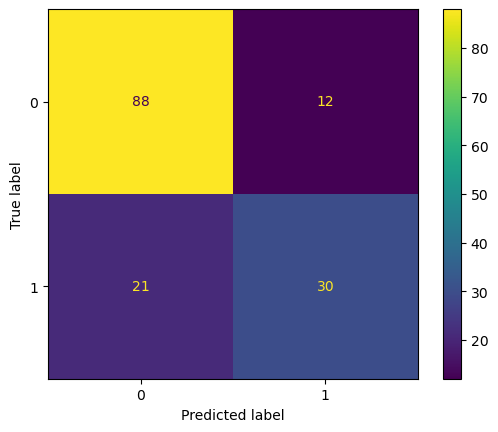

In [13]:
# get metrics of the best model
best_model = randomsearch.best_estimator_
pred = best_model.predict(test.drop(columns='outcome'))
print(f"Accuracy of the best model: {accuracy_score(test['outcome'], pred):.2%}\n")
print(classification_report(test['outcome'], pred))
confmat = confusion_matrix(test['outcome'], pred)
ConfusionMatrixDisplay(confmat).plot();

# A Final Note on Hyperparameter Tuning

Above, we saw two ways to optimize hyperparameters using Sci-kit Learn. And it was easy! Before we leave this topic, I want to mention two things to keep in mind:

1. Any decision that you make can be thought of as a hyperparameter. You can use similar techniques to decide which scaler to use, which features to include, how many rows of data to train the model on, and more. Almost anything. BUT! If you do too much tuning it can inadvertently lead to overfitting! The number of combinations you can try before it becomes a form of overfitting depends on the amount of data you have, but a good general rule is to make as many decisions as possible without running a cross-validation test, then tune the rest.
2. There are more advanced hyperparameter tuning methods available. Another method that isn't very hard to implement on your own is Bayesian Optimization. Bayesian Hyperparameter Tuning is similar to the Random Search method, but it uses the performance of previous combinations to try to pick a combination that will perform better. Cloud service providers like Amazon Web Services or Microsoft Azure or Google Cloud Platform have automated machine learning products that basically perform really complex hyperparameter tuning.